Datasets successfully loaded
X_train shape: (1002, 13)
X_val shape: (210, 13)
X_test shape: (210, 13)
Labels encoded
Shape of X_train after reshaping: (1002, 13, 1)
Shape of X_val after reshaping: (210, 13, 1)
Shape of X_test after reshaping: (210, 13, 1)


C:\Users\Abdelhamied\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - accuracy: 0.1753 - loss: 4.8419 - val_accuracy: 0.4238 - val_loss: 3.8311 - learning_rate: 0.0010
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3582 - loss: 3.7629 - val_accuracy: 0.3905 - val_loss: 3.6078 - learning_rate: 0.0010
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.4050 - loss: 3.4580 - val_accuracy: 0.4762 - val_loss: 3.3241 - learning_rate: 0.0010
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.4595 - loss: 3.0689 - val_accuracy: 0.5905 - val_loss: 3.0032 - learning_rate: 0.0010
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.4920 - loss: 2.9536 - val_accuracy: 0.6143 - val_loss: 2.7647 - learning_rate: 0.0010
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.5574 - loss: 2.6162 - val_accuracy: 0.6571 - val_loss: 2.5277 - learning_rate: 0.0010
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.5780 - loss: 2.4703 - 

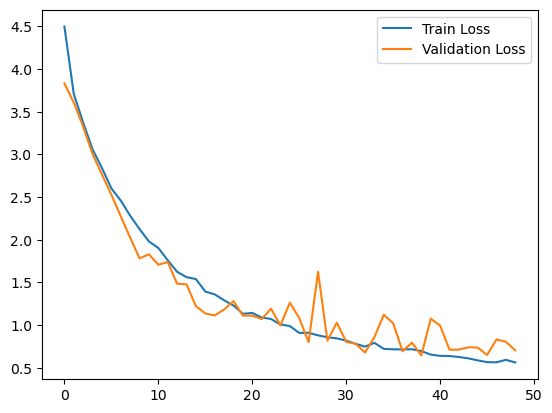

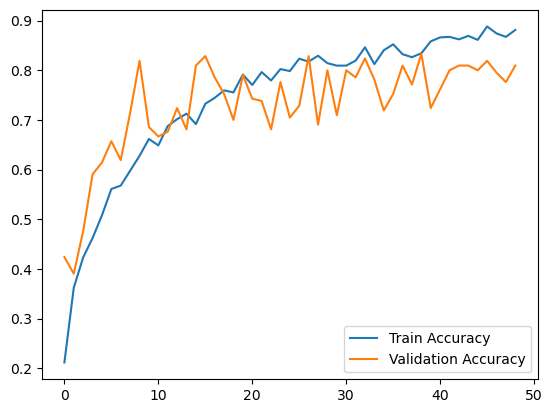

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step

Validation Classification Report:
                       precision    recall  f1-score   support

             OAF_Fear       0.85      0.97      0.91        30
OAF_Pleasant_surprise       0.74      0.57      0.64        30
              OAF_Sad       0.91      1.00      0.95        30
            OAF_angry       0.97      1.00      0.98        30
          OAF_disgust       0.95      0.67      0.78        30
            OAF_happy       0.60      0.80      0.69        30
          OAF_neutral       0.89      0.83      0.86        30

             accuracy                           0.83       210
            macro avg       0.84      0.83      0.83       210
         weighted avg       0.84      0.83      0.83       210



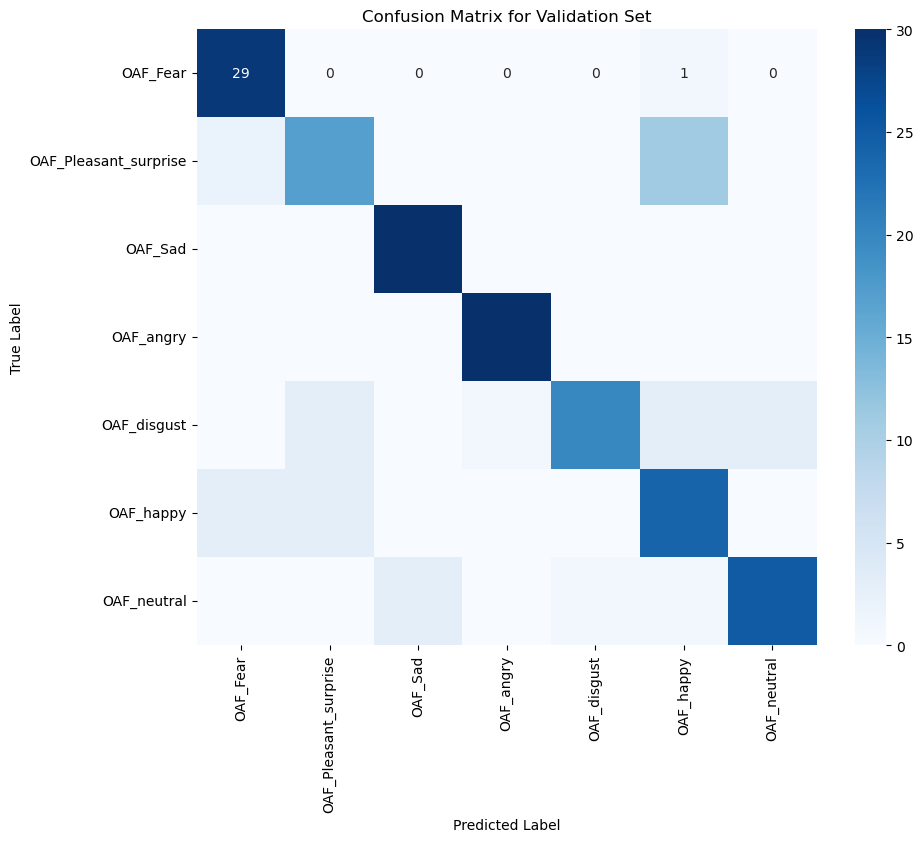

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 

Test Classification Report:
                       precision    recall  f1-score   support

             OAF_Fear       0.96      0.90      0.93        30
OAF_Pleasant_surprise       0.86      0.80      0.83        30
              OAF_Sad       0.83      1.00      0.91        30
            OAF_angry       1.00      1.00      1.00        30
          OAF_disgust       0.88      0.97      0.92        30
            OAF_happy       0.84      0.90      0.87        30
          OAF_neutral       1.00      0.77      0.87        30

             accuracy                           0.90       210
            macro avg       0.91      0.90      0.90       210
         weighted avg       0.91      0.90      0.90       210



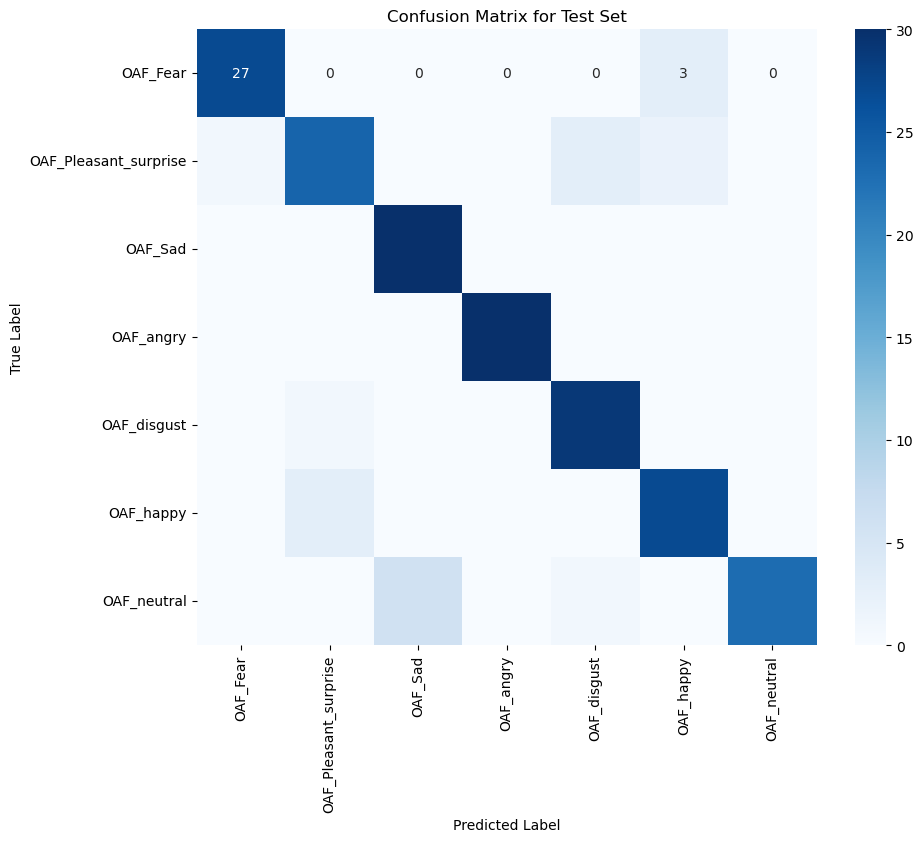

In [4]:
import os
import numpy as np
import librosa
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# =========================================================
# 1. CHARGEMENT DES DONNÉES AUDIO
# =========================================================

def load_audio_data_from_directory(directory, sr=22050, n_mfcc=13):
    data = []
    labels = []
    for dirname, _, filenames in os.walk(directory):
        for filename in filenames:
            if filename.endswith('.wav'):  # Assurez-vous que les fichiers sont au format wav
                file_path = os.path.join(dirname, filename)
                try:
                    # Charger le fichier audio
                    audio, _ = librosa.load(file_path, sr=sr)
                    # Extraire les MFCCs
                    mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=n_mfcc)
                    mfccs = np.mean(mfccs.T, axis=0)  # Moyenne des coefficients MFCC
                    data.append(mfccs)
                    # Le nom du dossier comme label
                    label = dirname.split(os.sep)[-1]
                    labels.append(label)
                except Exception as e:
                    print(f"Error loading {file_path}: {e}")
    return np.array(data), np.array(labels)

# Charger les ensembles de données
X_train, y_train = load_audio_data_from_directory('C:/Users/Abdelhamied/Desktop/ENSEA/Stage2A/Datasets/LSTM/train')
X_val, y_val = load_audio_data_from_directory('C:/Users/Abdelhamied/Desktop/ENSEA/Stage2A/Datasets/LSTM/val')
X_test, y_test = load_audio_data_from_directory('C:/Users/Abdelhamied/Desktop/ENSEA/Stage2A/Datasets/LSTM/test')

print("Datasets successfully loaded")

# Vérifiez les dimensions des données chargées
print("X_train shape:", X_train.shape)
print("X_val shape:", X_val.shape)
print("X_test shape:", X_test.shape)

# Encode labels
encoder = LabelEncoder()
all_labels = np.concatenate([y_train, y_val, y_test])
encoder.fit(all_labels)

y_train = encoder.transform(y_train)
y_val = encoder.transform(y_val)
y_test = encoder.transform(y_test)

print("Labels encoded")

# Reshape les données pour LSTM
X_train = np.expand_dims(X_train, axis=-1)
X_val = np.expand_dims(X_val, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)

print("Shape of X_train after reshaping:", X_train.shape)
print("Shape of X_val after reshaping:", X_val.shape)
print("Shape of X_test after reshaping:", X_test.shape)

# =========================================================
# 2. DÉFINITION ET ENTRAÎNEMENT DU MODÈLE
# =========================================================

model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]), kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(LSTM(64, return_sequences=False, kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(len(encoder.classes_), activation='softmax'))

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Définir les callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)

# Entraîner le modèle
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping, reduce_lr])

# =========================================================
# 3. ÉVALUATION DU MODÈLE
# =========================================================

val_loss, val_accuracy = model.evaluate(X_val, y_val)
print(f"Validation Loss: {val_loss}, Validation Accuracy: {val_accuracy}")

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

y_val_pred = model.predict(X_val)
y_val_pred_classes = np.argmax(y_val_pred, axis=1)

print("\nValidation Classification Report:")
print(classification_report(y_val, y_val_pred_classes, target_names=encoder.classes_))

val_cm = confusion_matrix(y_val, y_val_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(val_cm, annot=True, fmt='d', cmap='Blues', xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Validation Set')
plt.show()

y_test_pred = model.predict(X_test)
y_test_pred_classes = np.argmax(y_test_pred, axis=1)

print("\nTest Classification Report:")
print(classification_report(y_test, y_test_pred_classes, target_names=encoder.classes_))

test_cm = confusion_matrix(y_test, y_test_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(test_cm, annot=True, fmt='d', cmap='Blues', xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Test Set')
plt.show()


In [11]:
def predict_external_file_with_pie_chart(model, file_path, encoder, sr=22050, n_mfcc=13):
    try:
        # Charger le fichier audio
        audio, _ = librosa.load(file_path, sr=sr)
        # Extraire les MFCCs
        mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=n_mfcc)
        mfccs = np.mean(mfccs.T, axis=0)  # Moyenne des coefficients MFCC
        mfccs = np.expand_dims(mfccs, axis=0)  # Ajouter une dimension pour le batch
        mfccs = np.expand_dims(mfccs, axis=-1)  # Ajouter une dimension pour le nombre de canaux

        # Prédire avec le modèle
        prediction = model.predict(mfccs)
        predicted_class = np.argmax(prediction, axis=1)

        # Convertir l'index de classe en label
        predicted_label = encoder.inverse_transform(predicted_class)[0]
        probabilities = prediction[0]  # Probabilités pour chaque classe

        # Afficher les probabilités sous forme de diagramme circulaire
        labels = encoder.classes_
        plt.figure(figsize=(8, 8))
        plt.pie(probabilities, labels=labels, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("husl", len(labels)))
        plt.title(f"Probabilities for '{file_path}' (Predicted: {predicted_label})")
        plt.show()

        print(f"Predicted label for the audio file '{file_path}': {predicted_label}")
        return predicted_label

    except Exception as e:
        print(f"Error processing {file_path}: {e}")
        return None


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


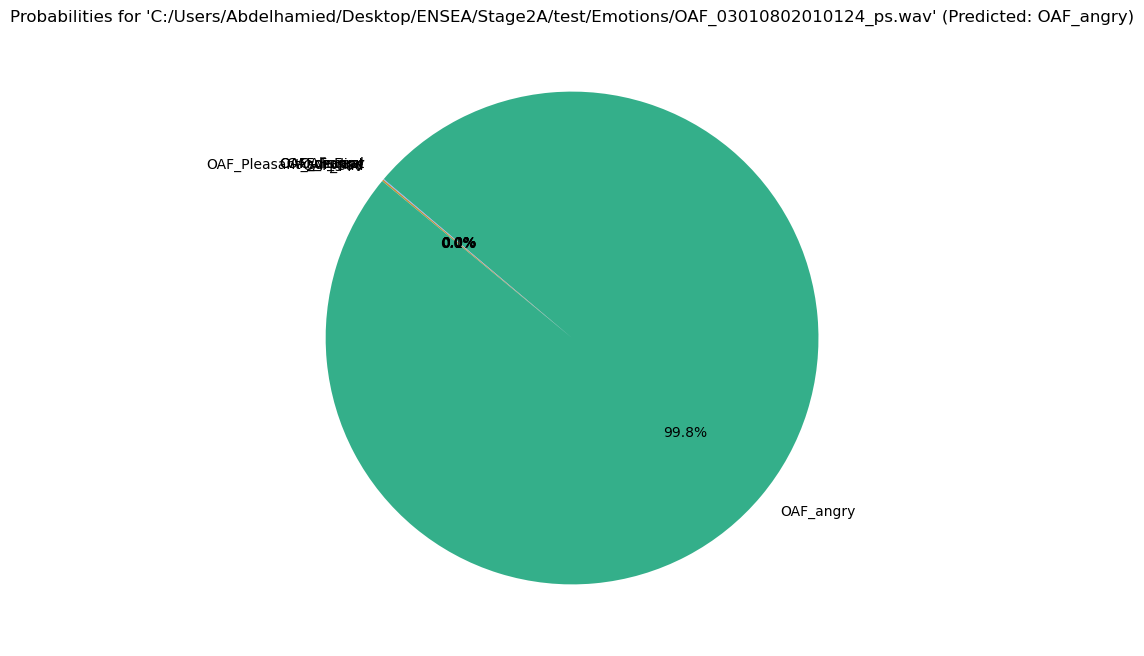

Predicted label for the audio file 'C:/Users/Abdelhamied/Desktop/ENSEA/Stage2A/test/Emotions/OAF_03010802010124_ps.wav': OAF_angry


In [13]:

# Exemple de test
external_file_path = 'C:/Users/Abdelhamied/Desktop/ENSEA/Stage2A/test/Emotions/OAF_03010802010124_ps.wav'
predicted_label = predict_external_file_with_pie_chart(model, external_file_path, encoder)


In [14]:
def add_gaussian_noise(signal, noise_level=0.005):
    noise = np.random.randn(len(signal))
    noisy_signal = signal + noise_level * noise
    return noisy_signal

def load_audio_data_with_augmentation(directory, sr=22050, n_mfcc=13, noise_level=0.005):
    data = []
    labels = []
    for dirname, _, filenames in os.walk(directory):
        for filename in filenames:
            if filename.endswith('.wav'):  # Assurez-vous que les fichiers sont au format wav
                file_path = os.path.join(dirname, filename)
                try:
                    # Charger le fichier audio
                    audio, _ = librosa.load(file_path, sr=sr)
                    # Ajouter du bruit gaussien
                    audio_noisy = add_gaussian_noise(audio, noise_level)
                    # Extraire les MFCCs
                    mfccs = librosa.feature.mfcc(y=audio_noisy, sr=sr, n_mfcc=n_mfcc)
                    mfccs = np.mean(mfccs.T, axis=0)  # Moyenne des coefficients MFCC
                    data.append(mfccs)
                    # Le nom du dossier comme label
                    label = dirname.split(os.sep)[-1]
                    labels.append(label)
                except Exception as e:
                    print(f"Error loading {file_path}: {e}")
    return np.array(data), np.array(labels)


In [15]:
def time_shift(signal, shift_max=0.2, sr=22050):
    shift = np.random.uniform(-shift_max, shift_max)
    shift_samples = int(shift * sr)
    shifted_signal = np.roll(signal, shift_samples)
    # Trim or pad the signal to ensure the same length
    if shift_samples > 0:
        shifted_signal[:shift_samples] = 0
    else:
        shifted_signal[shift_samples:] = 0
    return shifted_signal

def load_audio_data_with_time_shift(directory, sr=22050, n_mfcc=13, shift_max=0.2):
    data = []
    labels = []
    for dirname, _, filenames in os.walk(directory):
        for filename in filenames:
            if filename.endswith('.wav'):  # Assurez-vous que les fichiers sont au format wav
                file_path = os.path.join(dirname, filename)
                try:
                    # Charger le fichier audio
                    audio, _ = librosa.load(file_path, sr=sr)
                    # Décalage temporel
                    audio_shifted = time_shift(audio, shift_max, sr)
                    # Extraire les MFCCs
                    mfccs = librosa.feature.mfcc(y=audio_shifted, sr=sr, n_mfcc=n_mfcc)
                    mfccs = np.mean(mfccs.T, axis=0)  # Moyenne des coefficients MFCC
                    data.append(mfccs)
                    # Le nom du dossier comme label
                    label = dirname.split(os.sep)[-1]
                    labels.append(label)
                except Exception as e:
                    print(f"Error loading {file_path}: {e}")
    return np.array(data), np.array(labels)


Datasets with augmentation successfully loaded
Labels encoded
Shape of X_train after reshaping: (1002, 13, 1)
Shape of X_val after reshaping: (210, 13, 1)
Shape of X_test after reshaping: (210, 13, 1)


C:\Users\Abdelhamied\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - accuracy: 0.1880 - loss: 5.0645 - val_accuracy: 0.1476 - val_loss: 3.9321 - learning_rate: 0.0010
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3025 - loss: 3.9995 - val_accuracy: 0.1857 - val_loss: 3.7761 - learning_rate: 0.0010
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3911 - loss: 3.4922 - val_accuracy: 0.2952 - val_loss: 3.5659 - learning_rate: 0.0010
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4322 - loss: 3.1963 - val_accuracy: 0.3286 - val_loss: 3.3501 - learning_rate: 0.0010
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4937 - loss: 2.9469 - val_accuracy: 0.3667 - val_loss: 3.2407 - learning_rate: 0.0010
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4816 - loss: 2.8254 - val_accuracy: 0.2810 - val_loss: 3.3424 - learning_rate: 0.0010
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5232 - loss: 2.7209 - 

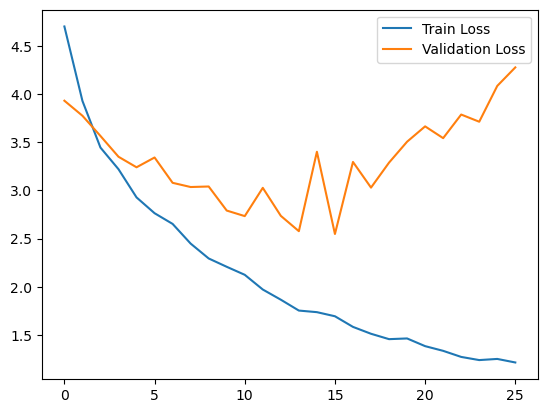

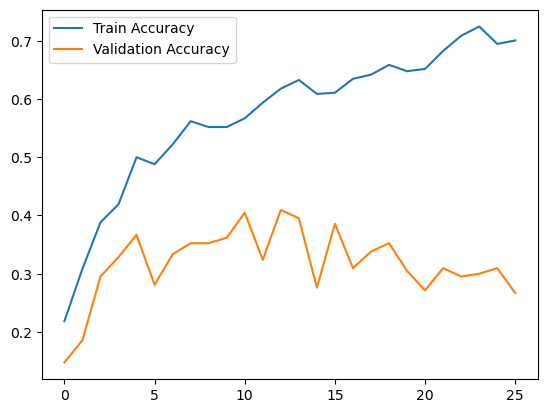

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step

Validation Classification Report:
                       precision    recall  f1-score   support

             OAF_Fear       0.80      0.27      0.40        30
OAF_Pleasant_surprise       0.32      0.23      0.27        30
              OAF_Sad       0.00      0.00      0.00        30
            OAF_angry       1.00      1.00      1.00        30
          OAF_disgust       0.29      0.70      0.41        30
            OAF_happy       0.20      0.50      0.29        30
          OAF_neutral       0.00      0.00      0.00        30

             accuracy                           0.39       210
            macro avg       0.37      0.39      0.34       210
         weighted avg       0.37      0.39      0.34       210



C:\Users\Abdelhamied\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Abdelhamied\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Abdelhamied\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


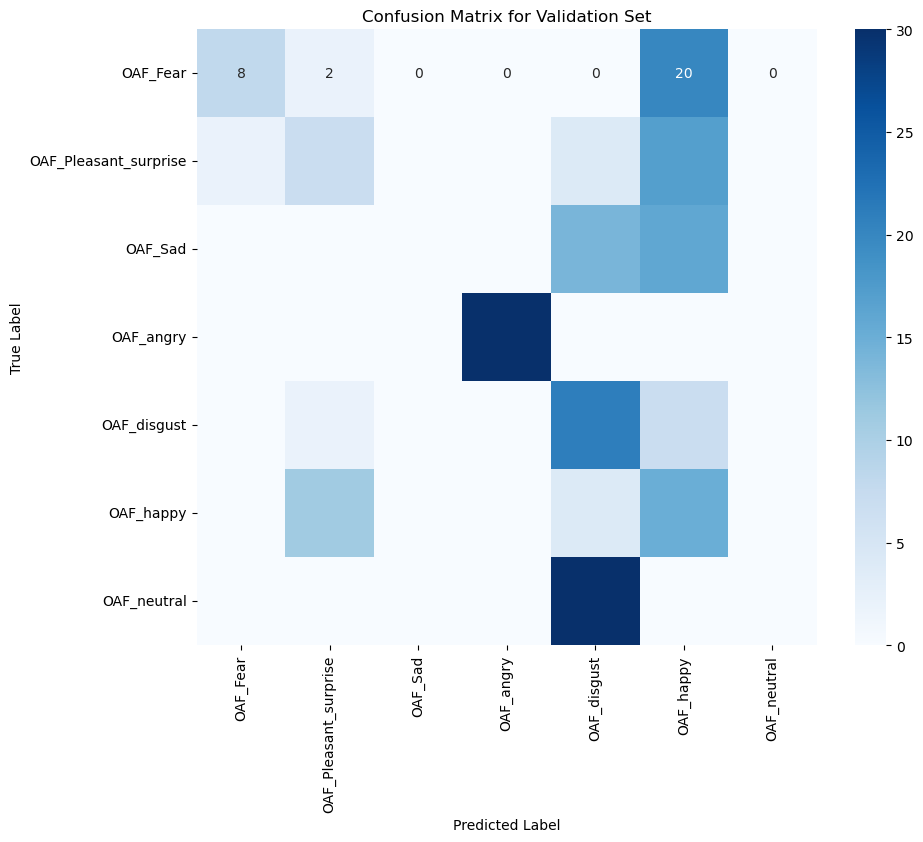

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 

Test Classification Report:
                       precision    recall  f1-score   support

             OAF_Fear       0.75      0.20      0.32        30
OAF_Pleasant_surprise       0.15      0.07      0.09        30
              OAF_Sad       1.00      0.03      0.06        30
            OAF_angry       1.00      0.83      0.91        30
          OAF_disgust       0.29      0.63      0.40        30
            OAF_happy       0.21      0.70      0.33        30
          OAF_neutral       0.00      0.00      0.00        30

             accuracy                           0.35       210
            macro avg       0.49      0.35      0.30       210
         weighted avg       0.49      0.35      0.30       210



C:\Users\Abdelhamied\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Abdelhamied\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Abdelhamied\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


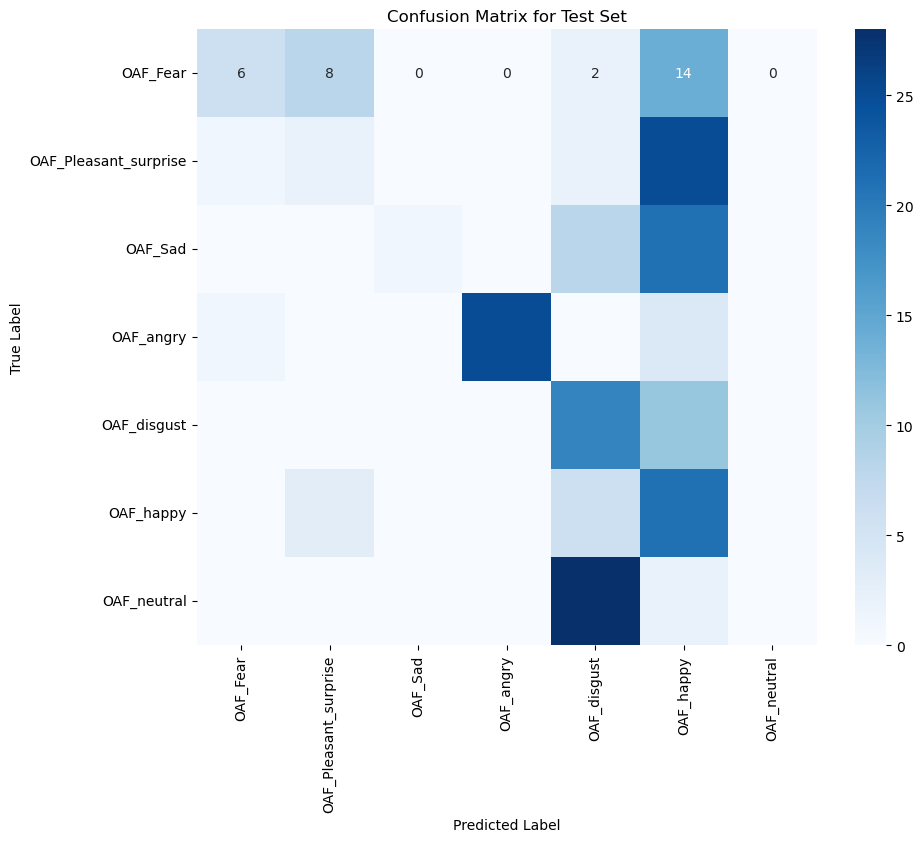

In [16]:
# Charger les ensembles de données avec augmentation
X_train, y_train = load_audio_data_with_augmentation('C:/Users/Abdelhamied/Desktop/ENSEA/Stage2A/Datasets/LSTM/train')
X_val, y_val = load_audio_data_with_time_shift('C:/Users/Abdelhamied/Desktop/ENSEA/Stage2A/Datasets/LSTM/val')
X_test, y_test = load_audio_data_from_directory('C:/Users/Abdelhamied/Desktop/ENSEA/Stage2A/Datasets/LSTM/test')

print("Datasets with augmentation successfully loaded")

# Encode labels
encoder = LabelEncoder()
all_labels = np.concatenate([y_train, y_val, y_test])
encoder.fit(all_labels)

y_train = encoder.transform(y_train)
y_val = encoder.transform(y_val)
y_test = encoder.transform(y_test)

print("Labels encoded")

# Reshape les données pour LSTM
X_train = np.expand_dims(X_train, axis=-1)
X_val = np.expand_dims(X_val, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)

print("Shape of X_train after reshaping:", X_train.shape)
print("Shape of X_val after reshaping:", X_val.shape)
print("Shape of X_test after reshaping:", X_test.shape)

# Définition et entraînement du modèle
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]), kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(LSTM(64, return_sequences=False, kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(len(encoder.classes_), activation='softmax'))

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Définir les callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)

# Entraîner le modèle
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping, reduce_lr])

# Évaluation du modèle
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print(f"Validation Loss: {val_loss}, Validation Accuracy: {val_accuracy}")

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

y_val_pred = model.predict(X_val)
y_val_pred_classes = np.argmax(y_val_pred, axis=1)

print("\nValidation Classification Report:")
print(classification_report(y_val, y_val_pred_classes, target_names=encoder.classes_))

val_cm = confusion_matrix(y_val, y_val_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(val_cm, annot=True, fmt='d', cmap='Blues', xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Validation Set')
plt.show()

y_test_pred = model.predict(X_test)
y_test_pred_classes = np.argmax(y_test_pred, axis=1)

print("\nTest Classification Report:")
print(classification_report(y_test, y_test_pred_classes, target_names=encoder.classes_))

test_cm = confusion_matrix(y_test, y_test_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(test_cm, annot=True, fmt='d', cmap='Blues', xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Test Set')
plt.show()


Datasets successfully loaded
X_train shape: (1002, 13)
X_val shape: (210, 13)
X_test shape: (210, 13)
Labels encoded
Shape of X_train after reshaping: (1002, 13, 1)
Shape of X_val after reshaping: (210, 13, 1)
Shape of X_test after reshaping: (210, 13, 1)


C:\Users\Abdelhamied\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
31/32 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.2072 - loss: 4.9264Epoch 1: Test Loss: 3.869943380355835, Test Accuracy: 0.4000000059604645
32/32 ━━━━━━━━━━━━━━━━━━━━ 20s 77ms/step - accuracy: 0.2095 - loss: 4.9078 - val_accuracy: 0.3714 - val_loss: 3.8710 - learning_rate: 0.0010
Epoch 2/100
31/32 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.3513 - loss: 3.9438Epoch 2: Test Loss: 3.628811836242676, Test Accuracy: 0.3761904835700989
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - accuracy: 0.3503 - loss: 3.9416 - val_accuracy: 0.3476 - val_loss: 3.6249 - learning_rate: 0.0010
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.4171 - loss: 3.5033Epoch 3: Test Loss: 3.3486037254333496, Test Accuracy: 0.48571428656578064
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.4173 - loss: 3.5022 - val_accuracy: 0.5286 - val_loss: 3.3349 - learning_rate: 0.0010
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.4378 - loss: 3.2056Epoch 4: Test Loss

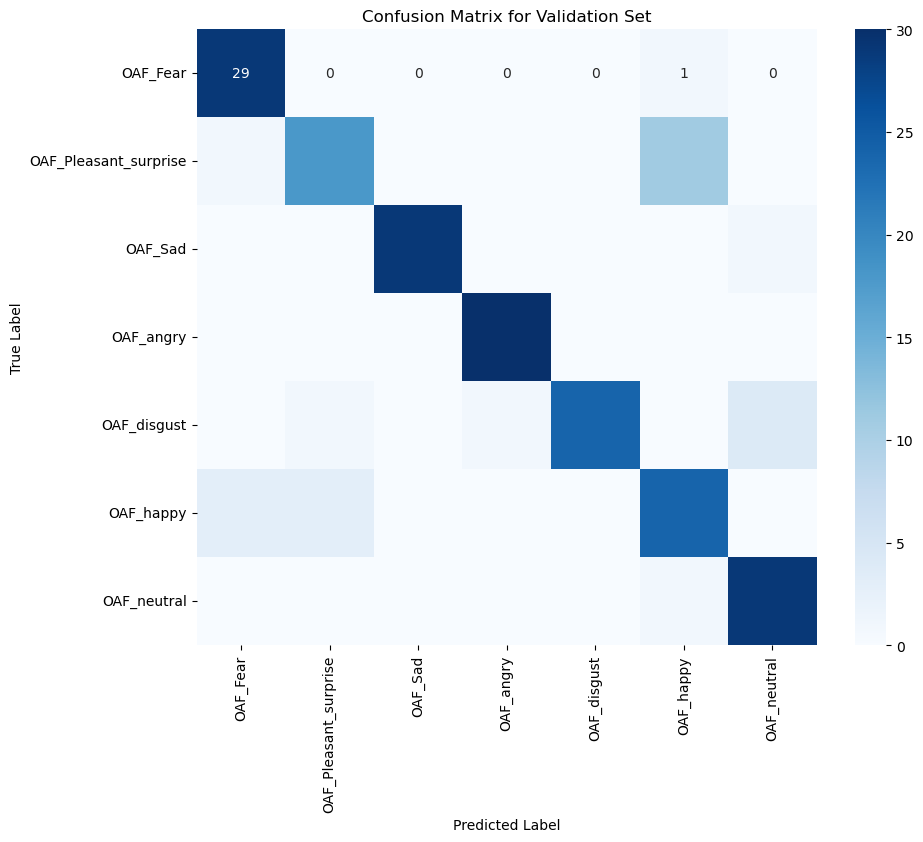

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step

Test Classification Report:
                       precision    recall  f1-score   support

             OAF_Fear       1.00      0.90      0.95        30
OAF_Pleasant_surprise       0.79      0.73      0.76        30
              OAF_Sad       0.90      0.93      0.92        30
            OAF_angry       0.97      1.00      0.98        30
          OAF_disgust       0.80      0.93      0.86        30
            OAF_happy       0.83      0.80      0.81        30
          OAF_neutral       0.90      0.87      0.88        30

             accuracy                           0.88       210
            macro avg       0.88      0.88      0.88       210
         weighted avg       0.88      0.88      0.88       210



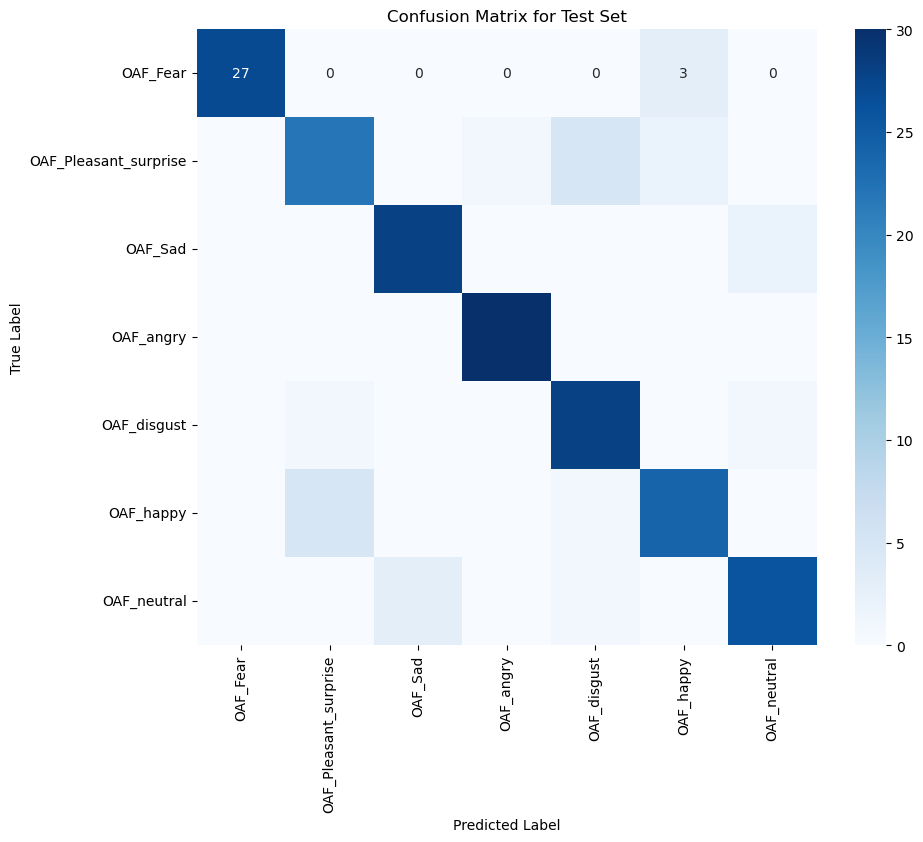

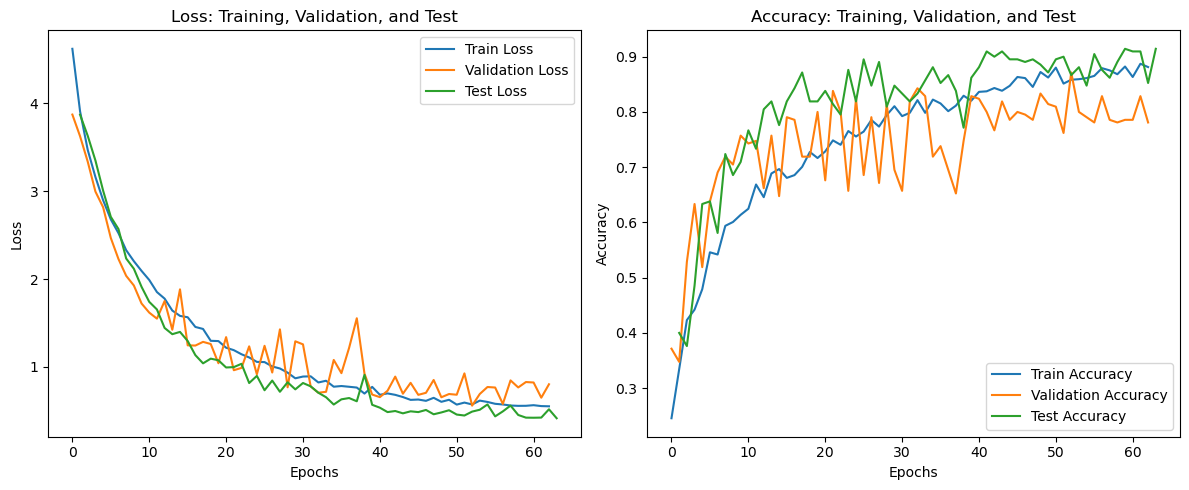

In [1]:
import os
import numpy as np
import librosa
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# =========================================================
# 1. CHARGEMENT DES DONNÉES AUDIO
# =========================================================

def load_audio_data_from_directory(directory, sr=22050, n_mfcc=13):
    data = []
    labels = []
    for dirname, _, filenames in os.walk(directory):
        for filename in filenames:
            if filename.endswith('.wav'):  # Assurez-vous que les fichiers sont au format wav
                file_path = os.path.join(dirname, filename)
                try:
                    # Charger le fichier audio
                    audio, _ = librosa.load(file_path, sr=sr)
                    # Extraire les MFCCs
                    mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=n_mfcc)
                    mfccs = np.mean(mfccs.T, axis=0)  # Moyenne des coefficients MFCC
                    data.append(mfccs)
                    # Le nom du dossier comme label
                    label = dirname.split(os.sep)[-1]
                    labels.append(label)
                except Exception as e:
                    print(f"Error loading {file_path}: {e}")
    return np.array(data), np.array(labels)

# Charger les ensembles de données
X_train, y_train = load_audio_data_from_directory('C:/Users/Abdelhamied/Desktop/ENSEA/Stage2A/Datasets/LSTM/train')
X_val, y_val = load_audio_data_from_directory('C:/Users/Abdelhamied/Desktop/ENSEA/Stage2A/Datasets/LSTM/val')
X_test, y_test = load_audio_data_from_directory('C:/Users/Abdelhamied/Desktop/ENSEA/Stage2A/Datasets/LSTM/test')

print("Datasets successfully loaded")

# Vérifiez les dimensions des données chargées
print("X_train shape:", X_train.shape)
print("X_val shape:", X_val.shape)
print("X_test shape:", X_test.shape)

# Encode labels
encoder = LabelEncoder()
all_labels = np.concatenate([y_train, y_val, y_test])
encoder.fit(all_labels)

y_train = encoder.transform(y_train)
y_val = encoder.transform(y_val)
y_test = encoder.transform(y_test)

print("Labels encoded")

# Reshape les données pour LSTM
X_train = np.expand_dims(X_train, axis=-1)
X_val = np.expand_dims(X_val, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)

print("Shape of X_train after reshaping:", X_train.shape)
print("Shape of X_val after reshaping:", X_val.shape)
print("Shape of X_test after reshaping:", X_test.shape)

# =========================================================
# 2. DÉFINITION ET ENTRAÎNEMENT DU MODÈLE
# =========================================================

class TestAccuracyCallback(tf.keras.callbacks.Callback):
    def __init__(self, test_data):
        self.test_data = test_data
        self.test_losses = []
        self.test_accuracies = []

    def on_epoch_end(self, epoch, logs=None):
        x_test, y_test = self.test_data
        test_loss, test_accuracy = self.model.evaluate(x_test, y_test, verbose=0)
        self.test_losses.append(test_loss)
        self.test_accuracies.append(test_accuracy)
        print(f"Epoch {epoch+1}: Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

# Créer le modèle
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]), kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(LSTM(64, return_sequences=False, kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(len(encoder.classes_), activation='softmax'))

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Définir les callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)

# Créer l'instance du callback avec les données de test
test_accuracy_callback = TestAccuracyCallback((X_test, y_test))

# Entraîner le modèle avec le callback personnalisé
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping, reduce_lr, test_accuracy_callback]
)

# =========================================================
# 3. ÉVALUATION DU MODÈLE
# =========================================================

# Évaluation sur l'ensemble de validation
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print(f"Validation Loss: {val_loss}, Validation Accuracy: {val_accuracy}")

# Classification report et confusion matrix pour l'ensemble de validation
y_val_pred = model.predict(X_val)
y_val_pred_classes = np.argmax(y_val_pred, axis=1)

print("\nValidation Classification Report:")
print(classification_report(y_val, y_val_pred_classes, target_names=encoder.classes_))

val_cm = confusion_matrix(y_val, y_val_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(val_cm, annot=True, fmt='d', cmap='Blues', xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Validation Set')
plt.show()

# Évaluation sur l'ensemble de test
y_test_pred = model.predict(X_test)
y_test_pred_classes = np.argmax(y_test_pred, axis=1)

print("\nTest Classification Report:")
print(classification_report(y_test, y_test_pred_classes, target_names=encoder.classes_))

test_cm = confusion_matrix(y_test, y_test_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(test_cm, annot=True, fmt='d', cmap='Blues', xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Test Set')
plt.show()

# Pertes d'entraînement et de test
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.plot(range(1, len(test_accuracy_callback.test_losses) + 1), test_accuracy_callback.test_losses, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss: Training, Validation, and Test')

# Exactitudes d'entraînement et de test
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.plot(range(1, len(test_accuracy_callback.test_accuracies) + 1), test_accuracy_callback.test_accuracies, label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy: Training, Validation, and Test')

plt.tight_layout()
plt.show()
